In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
hr=pd.read_csv('C:/Users/Administrator/Desktop/Machine learning/with karthirmani/datasets/HR Analytics.csv')
hr_dummies=pd.get_dummies(hr)
hr_dummies.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,...,0,0,1,0,0,0,1,1,0,1
1,49,0,279,8,1,1,2,3,61,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1,1373,2,2,1,4,4,92,2,...,0,0,0,0,0,0,1,1,0,1
3,33,0,1392,3,4,1,5,4,56,3,...,0,1,0,0,0,1,0,1,0,1
4,27,0,591,2,1,1,7,1,40,3,...,0,0,0,0,0,1,0,1,1,0


In [3]:
train,test=train_test_split(hr_dummies,test_size=0.3,random_state=100)
train_x=train.drop('Attrition',axis=1)
train_y=train['Attrition']
test_x=test.drop('Attrition',axis=1)
test_y=test['Attrition']

In [15]:
model=AdaBoostClassifier(random_state=100,n_estimators=800)
model.fit(train_x,train_y)
pred=model.predict(test_x)
print(accuracy_score(test_y,pred))
print(classification_report(test_y,pred))

0.8435374149659864
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       371
           1       0.51      0.41      0.46        70

   micro avg       0.84      0.84      0.84       441
   macro avg       0.70      0.67      0.68       441
weighted avg       0.83      0.84      0.84       441



In [10]:
def draw_tree(model,columns):
    from sklearn import tree
    from sklearn.externals.six import StringIO
    import pydotplus
    from IPython.display import Image
    import os
    
    graphviz_path='C:/Program Files (x86)/Graphviz2.38/bin/'
    os.environ['PATH'] += os.pathsep + graphviz_path

    dot_data=StringIO()
    tree.export_graphviz(model,
                        out_file=dot_data,
                        feature_names=columns)
    graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

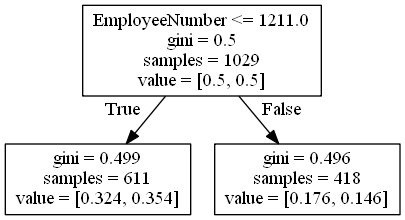

In [14]:
model.estimator_errors_
draw_tree(model.estimators_[250],train_x.columns)

In [18]:
model.estimator_errors_[:5]

array([0.16229349, 0.34244608, 0.36434203, 0.40214249, 0.40601838])

### Sensitivity and Specificity

In [23]:
pred_probs=pd.DataFrame(model.predict_proba(test_x),
                       columns=['Neg','Pos'])
pred_test=pred_probs['Pos'].apply(lambda x: 1 if x>0.5 else 0)
print(classification_report(test_y,pred_test))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       371
           1       0.51      0.41      0.46        70

   micro avg       0.84      0.84      0.84       441
   macro avg       0.70      0.67      0.68       441
weighted avg       0.83      0.84      0.84       441



In [29]:
tn,fp,fn,tp=confusion_matrix(test_y,pred_test).ravel()
sensitivity=(tp)/(tp+fn)
specificity=(tn)/(tn+fp)
print(sensitivity,specificity)

0.4142857142857143 0.9245283018867925


In [30]:
pred_test=pred_probs['Pos'].apply(lambda x: 1 if x>0.4994 else 0)
tn,fp,fn,tp=confusion_matrix(test_y,pred_test).ravel()
sensitivity=(tp)/(tp+fn)
specificity=(tn)/(tn+fp)
print(sensitivity,specificity)

0.5142857142857142 0.8652291105121294


#### we have to find the optimum value fo threshold using the ROC curve